In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:


# forward AIS
result = np.load('../bayes_implicit_solvent/marginal_likelihood/single_type_forward_ais_long_protocol_tiny.npz')
#optimized_result = np.load('../bayes_implicit_solvent/marginal_likelihood/single_type_forward_ais_optimized_protocol_longer.npz')
log_weight_trajectories = result['log_weight_trajectories']
works = - np.array([w[-1] for w in log_weight_trajectories])

BadZipFile: File is not a zip file

In [83]:

# reverse AIS
reverse_result = np.load('../bayes_implicit_solvent/marginal_likelihood/single_type_reverse_ais_long_protocol_tiny.npz')
#optimized_reverse_result = np.load('../bayes_implicit_solvent/marginal_likelihood/single_type_reverse_ais_optimized_protocol_longer.npz')
reverse_log_weight_trajectories = reverse_result['log_weight_trajectories']
reverse_works = - np.array([w[-1] for w in reverse_log_weight_trajectories])

In [84]:
max(works), min(works)

(81.78230589214331, 10.810765550557417)

In [85]:
max(-reverse_works), min(-reverse_works)

(17.065950393676758, 10.454560279846191)

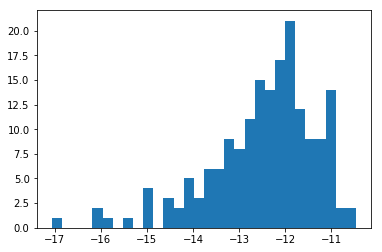

In [86]:
plt.hist(reverse_works, bins=30);

In [87]:
len(works), len(reverse_works)

(91, 177)

In [88]:
from pymbar import BAR
DeltaF, dDeltaF = BAR(w_F=works, w_R=reverse_works)
print(-DeltaF, dDeltaF)

-14.501000932984425 0.21784804949860298


In [70]:
bootstrapped_BAR_estimates = [-BAR(w_F=works[np.random.randint(0,len(works), len(works))],
                                   w_R=reverse_works[np.random.randint(0,len(reverse_works), len(reverse_works))])[0] for _ in tqdm(range(10000))]


 26%|██▋       | 2647/10000 [00:15<00:43, 168.44it/s]


 61%|██████    | 6057/10000 [00:30<00:16, 238.87it/s]


 98%|█████████▊| 9816/10000 [00:45<00:00, 229.13it/s]


100%|██████████| 10000/10000 [00:46<00:00, 215.22it/s]

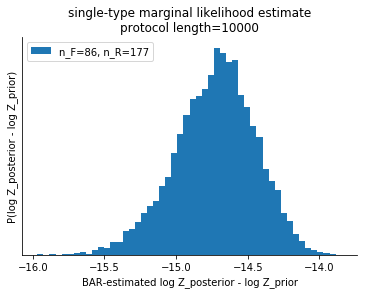

In [77]:
from bayes_implicit_solvent.utils import remove_top_right_spines
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.hist(bootstrapped_BAR_estimates, bins=50, density=True, label='n_F={}, n_R={}'.format(len(works), len(reverse_works)));
plt.xlabel('BAR-estimated log Z_posterior - log Z_prior')
plt.ylabel('P(log Z_posterior - log Z_prior)')
plt.yticks([])
plt.legend()
plt.title('single-type marginal likelihood estimate\nprotocol length={}'.format(len(log_weight_trajectories[0])))
plt.savefig('single_type_bootstrapped_bar_long_protocol.png', dpi=300)

In [92]:
np.save('bootstrapped_bar_long_protocol.npy', bootstrapped_BAR_estimates)

In [20]:
# with protocol optimization
optimized_log_weight_trajectories = optimized_result['log_weight_trajectories']
optimized_reverse_log_weight_trajectories = optimized_reverse_result['log_weight_trajectories']

optimized_works = - np.array([w[-1] for w in optimized_log_weight_trajectories])
optimized_reverse_works = - np.array([w[-1] for w in optimized_reverse_log_weight_trajectories])

NameError: name 'optimized_result' is not defined

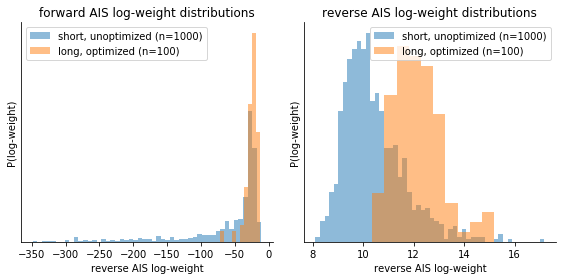

In [77]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
remove_top_right_spines(ax)
plt.hist(log_weight_trajectories[:,-1], bins=50, density=True, label='short, unoptimized (n={})'.format(len(log_weight_trajectories)), alpha=0.5);
plt.hist(optimized_log_weight_trajectories[:,-1], density=True, label='long, optimized (n={})'.format(len(optimized_log_weight_trajectories)), alpha=0.5);
plt.legend()
plt.xlabel('reverse AIS log-weight')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.title('forward AIS log-weight distributions')

ax = plt.subplot(1,2,2)
remove_top_right_spines(ax)
plt.hist(reverse_log_weight_trajectories[:,-1], bins=50, density=True, label='short, unoptimized (n={})'.format(len(reverse_log_weight_trajectories)), alpha=0.5);
plt.hist(optimized_reverse_log_weight_trajectories[:,-1], density=True, label='long, optimized (n={})'.format(len(optimized_reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()

plt.title('reverse AIS log-weight distributions');

plt.xlabel('reverse AIS log-weight')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.tight_layout()
plt.savefig('log_weight_distributions.png', dpi=300, bbox_inches='tight')

([], <a list of 0 Text yticklabel objects>)

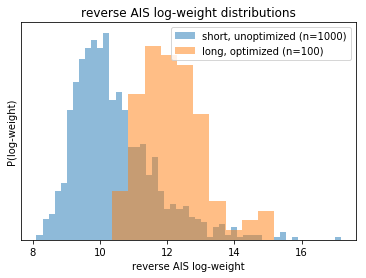

In [8]:
plt.hist(reverse_log_weight_trajectories[:,-1], bins=50, density=True, label='short, unoptimized (n={})'.format(len(reverse_log_weight_trajectories)), alpha=0.5);
plt.hist(optimized_reverse_log_weight_trajectories[:,-1], density=True, label='long, optimized (n={})'.format(len(optimized_reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()

plt.title('reverse AIS log-weight distributions');

plt.xlabel('reverse AIS log-weight')
plt.ylabel('P(log-weight)')
plt.yticks([])

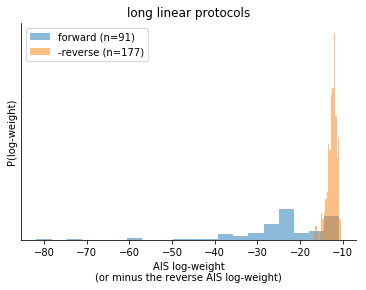

In [89]:

linear_n_bins=40
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.hist(log_weight_trajectories[:,-1], bins=20,
         density=True, label='forward (n={})'.format(len(log_weight_trajectories)), alpha=0.5);
plt.hist(-reverse_log_weight_trajectories[:,-1], bins=20,
         density=True, label='-reverse (n={})'.format(len(reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()

plt.xlabel('AIS log-weight\n(or minus the reverse AIS log-weight)')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.title('long linear protocols')


plt.savefig('diagnostic_longer_mcmc.png', dpi=300, bbox_inches='tight')

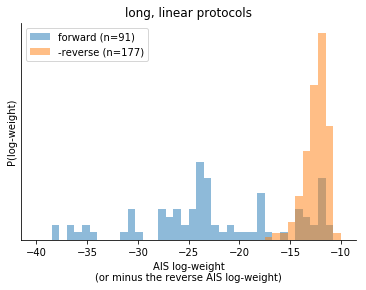

In [90]:

linear_n_bins=40
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.hist(log_weight_trajectories[:,-1], bins=40, range=(-40,-10),
         density=True, label='forward (n={})'.format(len(log_weight_trajectories)), alpha=0.5);
plt.hist(-reverse_log_weight_trajectories[:,-1], bins=40, range=(-40,-10),
         density=True, label='-reverse (n={})'.format(len(reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()

plt.xlabel('AIS log-weight\n(or minus the reverse AIS log-weight)')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.title('long, linear protocols')


plt.savefig('diagnostic_longer_mcmc_truncated_x_axis.png', dpi=300, bbox_inches='tight')

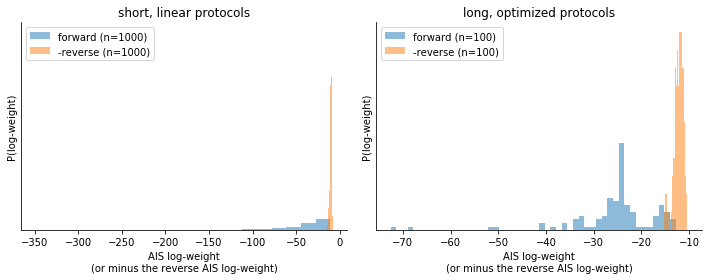

In [107]:

plt.figure(figsize=(10,4))

linear_n_bins=40
ax = plt.subplot(1,2,1)
remove_top_right_spines(ax)
plt.hist(log_weight_trajectories[:,-1], bins=20,
         density=True, label='forward (n={})'.format(len(log_weight_trajectories)), alpha=0.5);
plt.hist(-reverse_log_weight_trajectories[:,-1], bins=20,
         density=True, label='-reverse (n={})'.format(len(reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()

plt.xlabel('AIS log-weight\n(or minus the reverse AIS log-weight)')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.title('short, linear protocols')

optimized_n_bins = 20
ax = plt.subplot(1,2,2)
remove_top_right_spines(ax)
plt.hist(optimized_log_weight_trajectories[:,-1], bins=50,
         density=True, label='forward (n={})'.format(len(optimized_log_weight_trajectories)), alpha=0.5);
plt.hist(-optimized_reverse_log_weight_trajectories[:,-1], bins=20,
         density=True, label='-reverse (n={})'.format(len(optimized_reverse_log_weight_trajectories)), alpha=0.5);
plt.legend()


plt.xlabel('AIS log-weight\n(or minus the reverse AIS log-weight)')
plt.ylabel('P(log-weight)')
plt.yticks([])

plt.title('long, optimized protocols')
plt.tight_layout()

plt.savefig('diagnostic.png', dpi=300, bbox_inches='tight')

In [108]:
len(optimized_works) / (1 + np.std(optimized_works)**2)

1.097057760470938

In [110]:
np.sum(np.exp(-optimized_works))**2 / np.sum(np.exp(-optimized_works)**2)

5.701816207654612

In [23]:
np.sum(np.exp(-works))**2 / np.sum(np.exp(-works)**2)

8.006513938540511

In [24]:
len(works)

73

In [25]:
np.sum(np.exp(-reverse_works))**2 / np.sum(np.exp(-reverse_works)**2)

14.447986430952277

In [26]:
len(reverse_works)

167

In [28]:
works.shape

(73,)

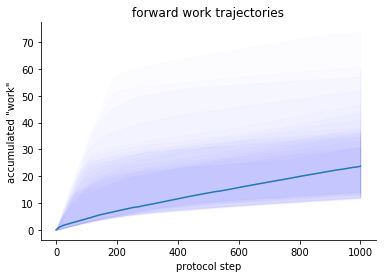

In [94]:
ax = plt.subplot(1,1,1)
work_trajectories = -log_weight_trajectories
median = np.median(work_trajectories, 0)

x = np.arange(len(median)) / 10
plt.plot(x, median)

for alpha in range(1,20):
    lb,ub = np.percentile(work_trajectories, [alpha,100 - alpha], axis=0)
    plt.fill_between(x, lb, ub, alpha=0.01, color='blue')
plt.xlabel('protocol step')
plt.ylabel('accumulated "work"')
plt.title('forward work trajectories')
remove_top_right_spines(ax)
plt.savefig('forward_work_trajectories.png', dpi=300)
#plt.plot(np.median(reverse_log_weight_trajectories, 0))

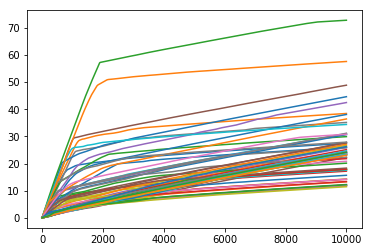

In [79]:
plt.plot(work_trajectories.T);

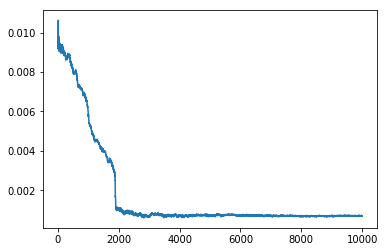

In [62]:
plt.plot(np.std(np.diff(log_weight_trajectories, axis=1), axis=0))

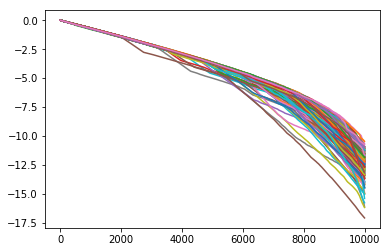

In [81]:
reverse_work_trajectories = -reverse_log_weight_trajectories
plt.plot(reverse_work_trajectories.T);

In [111]:
np.sum(np.exp(-optimized_reverse_works))**2 / np.sum(np.exp(-optimized_reverse_works)**2)

25.38404940372468

In [9]:
len(optimized_reverse_works), len(optimized_works)

(100, 100)

In [10]:
optimized_bootstrapped_BAR_estimates = [-BAR(w_F=optimized_works[np.random.randint(0,len(optimized_works), len(optimized_works))],
                                   w_R=optimized_reverse_works[np.random.randint(0,len(optimized_reverse_works), len(optimized_reverse_works))])[0] for _ in tqdm(range(10000))]

100%|██████████| 10000/10000 [00:18<00:00, 539.50it/s]


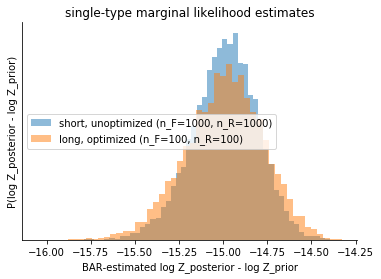

In [69]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.hist(bootstrapped_BAR_estimates, bins=50, density=True,
         label='short, unoptimized (n_F={}, n_R={})'.format(len(works), len(reverse_works)),
         alpha=0.5);
plt.hist(optimized_bootstrapped_BAR_estimates, bins=50, density=True,
         label='long, optimized (n_F={}, n_R={})'.format(len(optimized_works), len(optimized_reverse_works)),
         alpha=0.5);
plt.xlabel('BAR-estimated log Z_posterior - log Z_prior')
plt.ylabel('P(log Z_posterior - log Z_prior)')
plt.yticks([])
plt.title('single-type marginal likelihood estimates')
plt.legend(loc='center left')

plt.savefig('single_type_marginal_likelihood_estimates.png', dpi=300)

In [68]:
np.mean(optimized_bootstrapped_BAR_estimates)

-14.994430572771858

In [20]:
trajectories= result['trajectories']
log_weight_trajectories = result['log_weight_trajectories']

In [21]:
log_weight_trajectories.shape

(1000, 100)

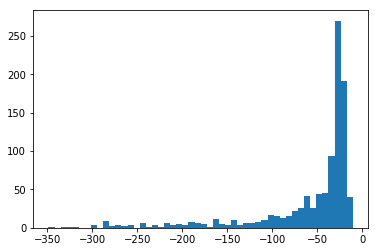

In [22]:
plt.hist(log_weight_trajectories[:,99], bins=50);

In [23]:
len(trajectories)

1000

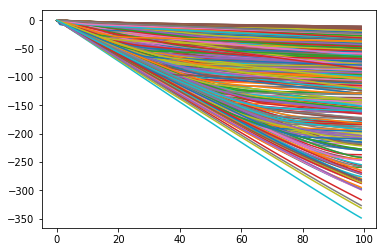

In [24]:
plt.plot(log_weight_trajectories.T);

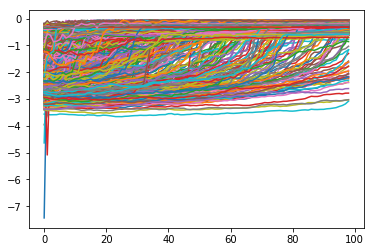

In [25]:
plt.plot(np.diff(log_weight_trajectories.T, axis=0));

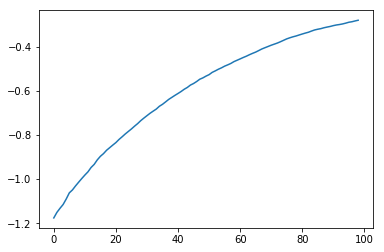

In [26]:
plt.plot(np.mean(np.diff(log_weight_trajectories.T, axis=0), 1));

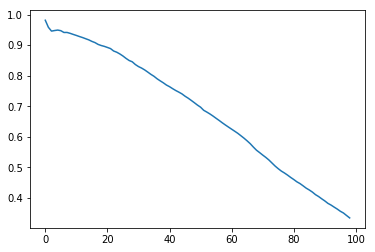

In [27]:
plt.plot(np.std(np.diff(log_weight_trajectories.T, axis=0), 1));

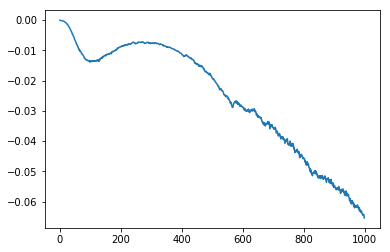

In [28]:
plt.plot(np.mean(np.diff(optimized_log_weight_trajectories.T, axis=0), 1));

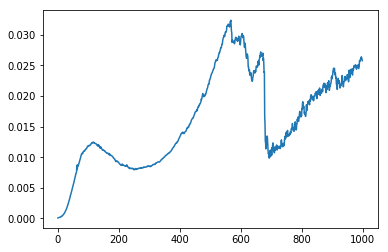

In [29]:
plt.plot(np.std(np.diff(optimized_log_weight_trajectories.T, axis=0), 1));

In [ ]:
bootstrapped_BAR_estimates

In [9]:
def resample(array):
    return array[np.random.randint(0,len(array),len(array))]

In [8]:
from pymbar import EXP
bootstrapped_forward_exp_estimates = -np.array([EXP(resample(works))[0] for _ in tqdm(range(10000))])
bootstrapped_reverse_exp_estimates = np.array([EXP(resample(reverse_works))[0] for _ in tqdm(range(10000))])

optimized_bootstrapped_forward_exp_estimates = -np.array([EXP(resample(optimized_works))[0] for _ in tqdm(range(10000))])
optimized_bootstrapped_reverse_exp_estimates = np.array([EXP(resample(optimized_reverse_works))[0] for _ in tqdm(range(10000))])


  0%|          | 0/10000 [00:00<?, ?it/s]

NameError: name 'resample' is not defined

In [10]:
bootstrapped_reverse_exp_estimates = np.array([EXP(resample(reverse_works))[0] for _ in tqdm(range(10000))])


100%|██████████| 10000/10000 [00:02<00:00, 4353.16it/s]

(array([  14.,  140.,  663., 1586., 2389., 2426., 1740.,  810.,  204.,
          28.]), array([-14.29761014, -14.13020825, -13.96280636, -13.79540447,
        -13.62800259, -13.4606007 , -13.29319881, -13.12579692,
        -12.95839504, -12.79099315, -12.62359126]), <a list of 10 Patch objects>)

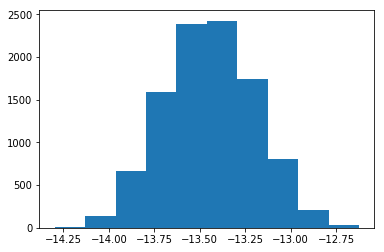

In [11]:
plt.hist(bootstrapped_reverse_exp_estimates)

In [91]:
forward_color = 'green'
reverse_color = 'purple'

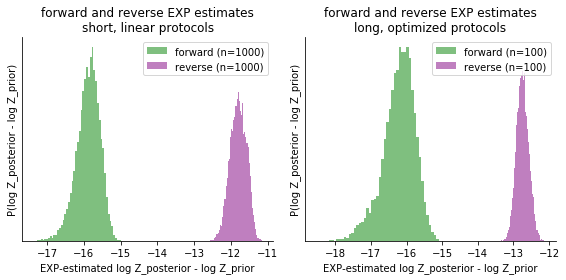

In [95]:
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
remove_top_right_spines(ax)

plt.hist(bootstrapped_forward_exp_estimates, bins=50, label='forward (n={})'.format(len(works)),
         color=forward_color, alpha=0.5);
plt.hist(bootstrapped_reverse_exp_estimates, bins=50, label='reverse (n={})'.format(len(reverse_works)),
        color=reverse_color, alpha=0.5);
plt.legend()

plt.xlabel('EXP-estimated log Z_posterior - log Z_prior')
plt.ylabel('P(log Z_posterior - log Z_prior)')
plt.yticks([])
plt.title('forward and reverse EXP estimates\nshort, linear protocols')

ax = plt.subplot(1,2,2)
remove_top_right_spines(ax)

plt.title('forward and reverse EXP estimates\nlong, optimized protocols')

plt.xlabel('EXP-estimated log Z_posterior - log Z_prior')
plt.ylabel('P(log Z_posterior - log Z_prior)')
plt.yticks([])

plt.hist(optimized_bootstrapped_forward_exp_estimates, bins=50, label='forward (n={})'.format(len(optimized_works)),
         color=forward_color, alpha=0.5);
plt.hist(optimized_bootstrapped_reverse_exp_estimates, bins=50, label='reverse (n={})'.format(len(optimized_reverse_works)),
         color=reverse_color, alpha=0.5);

plt.legend()

plt.tight_layout()
plt.savefig('exp_estimates.png', dpi=300, bbox_inches='tight')

In [181]:
EXP(-reverse_works)

(9.905535000885257, 0.05192211991303868)

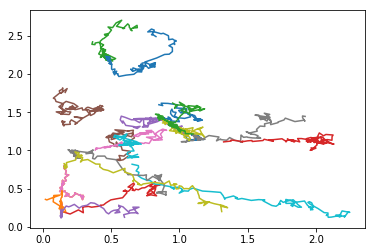

In [42]:
for _ in range(20):
    i = np.random.randint(len(trajectories))
    plt.plot(*trajectories[i].T)

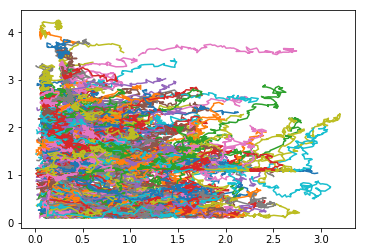

In [43]:
for i in range(len(trajectories)):
    plt.plot(*trajectories[i].T)

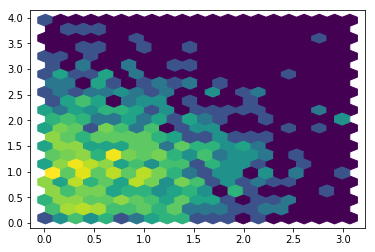

In [48]:
plt.hexbin(*trajectories[:,0].T, gridsize=20, bins='log')

Text(0.5, 1.0, 'AIS particles at t=99')

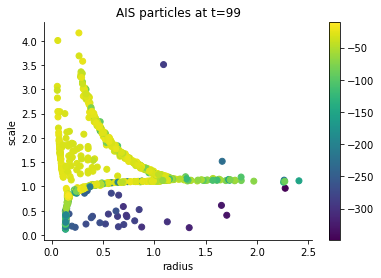

In [76]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.xlabel('radius')
plt.ylabel('scale')
t = len(trajectories[0]) - 1
plt.scatter(*trajectories[:,t].T, c=log_weight_trajectories[:,t])
#plt.plot(*trajectories[:,t].T, alpha=0.5)
plt.colorbar()
plt.title('AIS particles at t={}'.format(t))

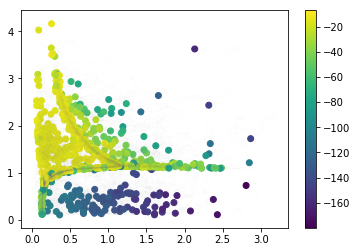

In [67]:
#t = 10
t = 50

for traj in trajectories:
    plt.plot(*traj[:t].T, color='grey', alpha=0.1, linewidth=0.1)
    
plt.scatter(*trajectories[:,t].T, c=log_weight_trajectories[:,t])
plt.colorbar()

In [117]:
posterior_sampling_result = np.load('../bayes_implicit_solvent/marginal_likelihood/single_type_posterior_samples.npz')

In [137]:
log_prob_traj = posterior_sampling_result['log_probs']

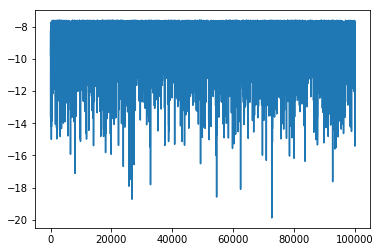

In [138]:
plt.plot(log_prob_traj)

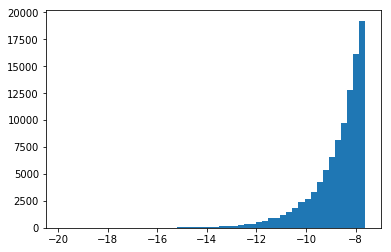

In [119]:
plt.hist(posterior_sampling_result['log_probs'], bins=50);

In [120]:
traj = posterior_sampling_result['traj']

In [121]:
traj.shape

(100001, 2)

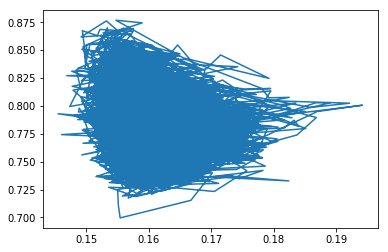

In [122]:
plt.plot(*traj.T)

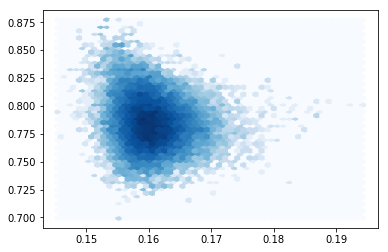

In [124]:
plt.hexbin(*traj.T, cmap='Blues', bins='log', gridsize=50);

In [43]:
posterior_sampling_result['acceptance_probability']

array(0.3276)